In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
startup=pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [5]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

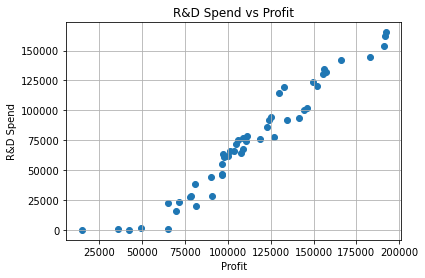

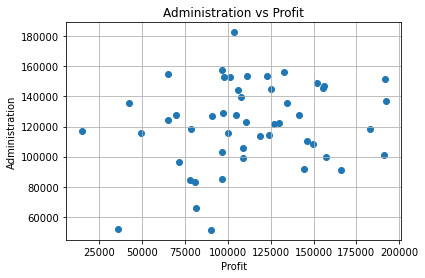

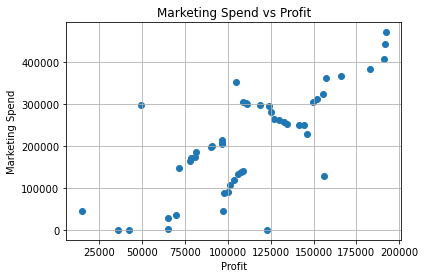

In [6]:
for i in startup.columns[:-2]:
    plt.scatter(startup['Profit'],startup[i])
    plt.title(i+' vs Profit')
    plt.xlabel('Profit')
    plt.ylabel(i)
    plt.grid()
    plt.show()

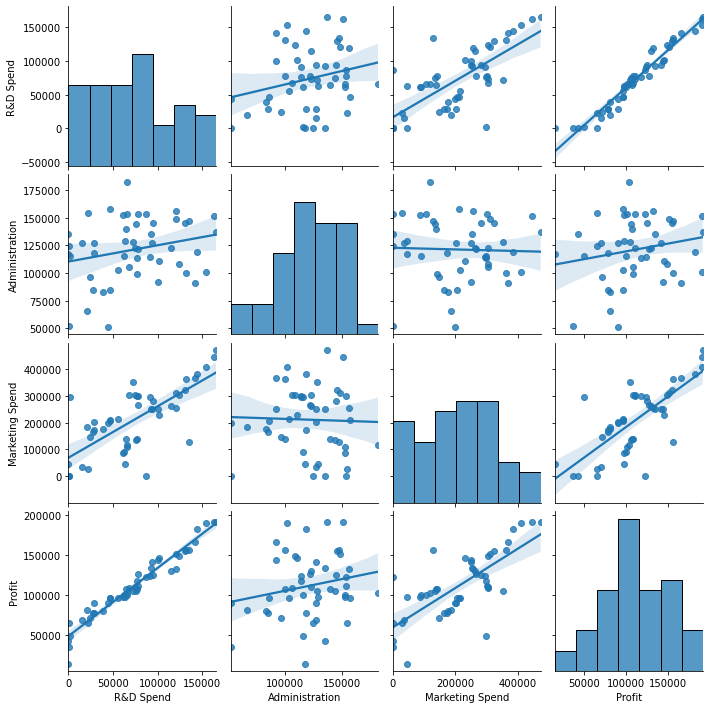

In [7]:
sns.pairplot(startup,kind='reg')

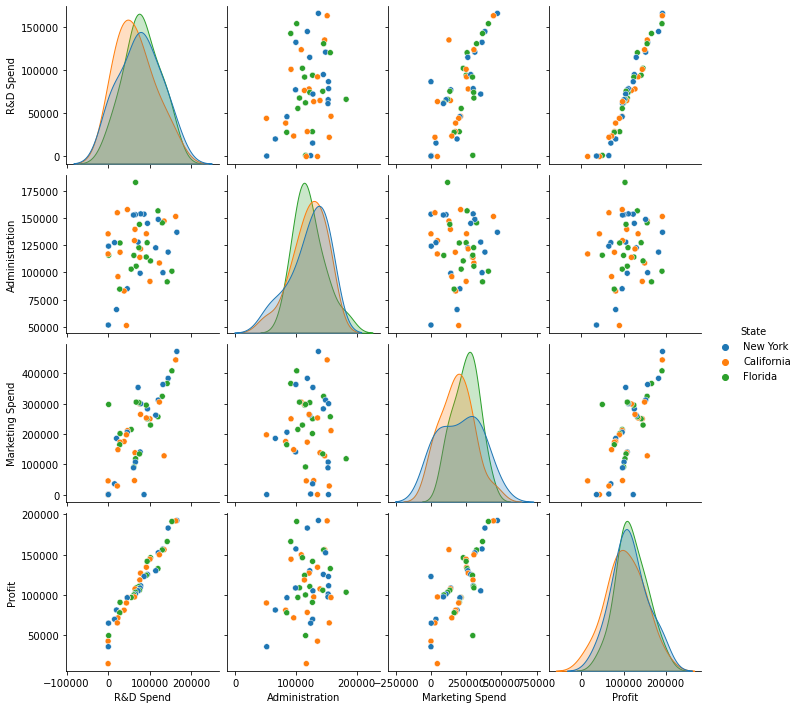

In [8]:
sns.pairplot(startup,hue='State')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x=startup[['R&D Spend', 'Administration', 'Marketing Spend']]
y=startup['Profit']

In [11]:
xtrain , xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=10)

In [12]:
xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 32 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        37 non-null     float64
 1   Administration   37 non-null     float64
 2   Marketing Spend  37 non-null     float64
dtypes: float64(3)
memory usage: 1.2 KB


In [13]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 37 to 40
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        13 non-null     float64
 1   Administration   13 non-null     float64
 2   Marketing Spend  13 non-null     float64
dtypes: float64(3)
memory usage: 416.0 bytes


In [14]:
ytrain.shape

(37,)

In [15]:
ytest.shape

(13,)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
model1=LinearRegression().fit(xtrain,ytrain)

In [18]:
model1.coef_

array([ 0.79394275, -0.00790195,  0.02329247])

In [19]:
pd.DataFrame(model1.coef_,columns=['coef_'],index=x.columns)

,coef_
R&D Spend,0.793943
Administration,-0.007902
Marketing Spend,0.023292


In [20]:
print('%.1f%%'%(model1.score(xtest,ytest)*100))

98.8%


In [21]:
ypred=model1.predict(xtest)
ypred

array([ 88361.6924659 , 109068.75037541,  66233.18132181,  70645.38100143,
        48118.47333074, 115786.66944536, 171799.96557761,  99617.55808099,
       159031.78297409, 157877.26074356,  83222.30531514, 179714.94106163,
        75105.99525989])

In [22]:
ytest

37     89949.14
23    108733.99
44     65200.33
42     71498.49
47     42559.73
20    118474.03
3     182901.99
30     99937.59
7     155752.60
6     156122.51
39     81005.76
2     191050.39
40     78239.91
Name: Profit, dtype: float64

In [23]:
from sklearn.metrics import mean_absolute_error

In [24]:
print(mean_absolute_error(ytest,ypred))

3476.6285513802677


In [25]:
100*mean_absolute_error(ytest,ypred)/ypred[0]

3.93454273493219

In [26]:
x.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [28]:
final_model=model1

In [29]:
pd.to_pickle(final_model,'StartupProfitPrediction')